In [2]:
# Laod misc Libraries
import numpy as np
import pandas as pd

# EDA Visuals
import sweetviz as sv

In [3]:
# Load data
#data = pd.read_csv('/Users/leaharsenault/Desktop/capstone/cleanData.csv', low_memory = False)
data=pd.read_csv('30142-0001-Data.tsv',sep='\t')

In [4]:
data.head()

,SWANID,VISIT,INTDAY4,AGE4,LANGINT4,RACE,PREGNAN4,PREVBLO4,EATDRIN4,STRTPER4,...,SPSCDAY4,SPSCTIM4,SPSCMOD4,HPSCDAY4,HPSCTIM4,HPSCMOD4,SPBMDT4,HPBMDT4,BMDFLG4,STATUS4
0,10046,4,1509,56,1,2,1,1,1,2,...,1509,0:10:20,5,1509,0:10:03,5,1.172,.9993,0,7
1,10056,4,1454,55,1,4,1,1,1,1,...,1491,0:14:56,11,1491,0:14:55,11,.8547,.8295,0,2
2,10126,4,1463,52,1,1,1,,1,1,...,,.,,,.,,,,,2
3,10153,4,1437,55,1,3,1,1,1,1,...,1492,0:09:38,11,1492,0:09:35,11,1.0095,.9718,0,2
4,10196,4,1496,50,1,2,1,1,1,1,...,,.,,1496,0:08:41,5,,.7755,0,2


In [5]:
# Remove columns with >75% null values
data = data.loc[:, data.isnull().mean() < .75]

In [6]:
data.head()

,SWANID,VISIT,INTDAY4,AGE4,LANGINT4,RACE,PREGNAN4,PREVBLO4,EATDRIN4,STRTPER4,...,SPSCDAY4,SPSCTIM4,SPSCMOD4,HPSCDAY4,HPSCTIM4,HPSCMOD4,SPBMDT4,HPBMDT4,BMDFLG4,STATUS4
0,10046,4,1509,56,1,2,1,1,1,2,...,1509,0:10:20,5,1509,0:10:03,5,1.172,.9993,0,7
1,10056,4,1454,55,1,4,1,1,1,1,...,1491,0:14:56,11,1491,0:14:55,11,.8547,.8295,0,2
2,10126,4,1463,52,1,1,1,,1,1,...,,.,,,.,,,,,2
3,10153,4,1437,55,1,3,1,1,1,1,...,1492,0:09:38,11,1492,0:09:35,11,1.0095,.9718,0,2
4,10196,4,1496,50,1,2,1,1,1,1,...,,.,,1496,0:08:41,5,,.7755,0,2


In [7]:
# Remove columns with >50% null values
data = data.loc[:, data.isnull().mean() < .5]

In [8]:
data.head()

,SWANID,VISIT,INTDAY4,AGE4,LANGINT4,RACE,PREGNAN4,PREVBLO4,EATDRIN4,STRTPER4,...,SPSCDAY4,SPSCTIM4,SPSCMOD4,HPSCDAY4,HPSCTIM4,HPSCMOD4,SPBMDT4,HPBMDT4,BMDFLG4,STATUS4
0,10046,4,1509,56,1,2,1,1,1,2,...,1509,0:10:20,5,1509,0:10:03,5,1.172,.9993,0,7
1,10056,4,1454,55,1,4,1,1,1,1,...,1491,0:14:56,11,1491,0:14:55,11,.8547,.8295,0,2
2,10126,4,1463,52,1,1,1,,1,1,...,,.,,,.,,,,,2
3,10153,4,1437,55,1,3,1,1,1,1,...,1492,0:09:38,11,1492,0:09:35,11,1.0095,.9718,0,2
4,10196,4,1496,50,1,2,1,1,1,1,...,,.,,1496,0:08:41,5,,.7755,0,2


In [9]:
#analyze_report = sv.analyze(data, pairwise_analysis='on')
#analyze_report.show_html()

In [10]:
# TRBLSLE WAKEARL and WAKEUP have the same distributions.
data['TRBLSLE4'].value_counts()

1     1394
2      425
3      345
4      193
5      162
       113
-9      47
Name: TRBLSLE4, dtype: int64

In [11]:
# Convert TRBLSLE to binary
data['TRBLSLE4'] = np.where(data['TRBLSLE4']=='1', 1, 0)

In [12]:
# Convert WAKEUP to binary
data['WAKEUP4'] = np.where(data['WAKEUP4']=='1', 1, 0)


# Convert WAKEARL to binary
data['WAKEARL4'] = np.where(data['WAKEARL4']=='1', 1, 0)
                        

In [13]:
data['TRBLSLE4'].value_counts()

1    1394
0    1285
Name: TRBLSLE4, dtype: int64

In [14]:
data['WAKEUP4'].value_counts()

0    1927
1     752
Name: WAKEUP4, dtype: int64

In [15]:
data['WAKEARL4'].value_counts()

0    1476
1    1203
Name: WAKEARL4, dtype: int64

In [16]:
## Build sleeping index ##
data["sleepTarget"] = data[['TRBLSLE4', 'WAKEUP4', 'WAKEARL4']].mean(axis=1)


In [17]:
data['sleepTarget'].value_counts()

0.000000    933
0.333333    667
0.666667    555
1.000000    524
Name: sleepTarget, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Columns: 676 entries, SWANID to sleepTarget
dtypes: float64(1), int64(6), object(669)
memory usage: 13.8+ MB


In [19]:
## Running Sweet Viz, I found more to adjust ##

data = data.replace({
    "1: No":"No",
    "2: Yes":"Yes",})



In [20]:
# Still more to adjust #

In [21]:
data = data.replace({
    "Yes, somewhat upsetting" : "Yes, Somewhat Upsetting",
    "3: Yes, Somewhat Upsetting" : "Yes, Somewhat Upsetting",
    "Yes, Somewhat Upsetting" : "Yes, Somewhat Upsetting",
    "3: Yes, somewhat upsetting" : "Yes, Somewhat Upsetting",
    "Yes, very upsetting" : "Yes, Very Upsetting",
    "4: Yes, Very Upsetting" : "Yes, Very Upsetting",
    "Yes, Very Upsetting" : "Yes, Very Upsetting",
    "4: Yes, very upsetting" : "Yes, Very Upsetting",
    "Yes, Very Upsetting & Still Upsetting" : "Yes, Very Upsetting and Still Upsetting",
    "5: Yes, very upsetting & still upsetting" : "Yes, Very Upsetting and Still Upsetting",
    "Yes, very upsetting & still upsetting" : "Yes, Very Upsetting and Still Upsetting",
    "5: Yes, Very Upsetting & Still Upsetting" : "Yes, Very Upsetting and Still Upsetting",
    "Yes, very upsetting and still upsetting" : "Yes, Very Upsetting and Still Upsetting",
    "Yes, not at all upsetting" : "Yes,Not Upsetting",
    "2: Yes, Not At All Upsetting" : "Yes,Not Upsetting",
    "Yes, Not At All Upsetting" : "Yes,Not Upsetting",
    "2: Yes, not at all upsetting" : "Yes,Not Upsetting",})

In [22]:
data = data.replace({
    "None or <1/week" : "None or <1/week",
    "1: None or <1/week" : "None or <1/week",
    "1: None or less than 1/week" : "None or <1/week",
    "3-4/week" : "3-4/week",
    "1/week" : "1/week",
    "2/week" : "2/week",
    "4: 3-4/week" : "3-4/week",
    "2: 1/week" : "1/week",
    "3: 2/week" : "2/week",
    "5-6/week" : "5-6/week",
    "5: 5-6/week" : "5-6/week",
    "6: >=7/week" : "6: >=7/week",
    "6: Equal to or more than 7/week" : "6: >=7/week",})

In [23]:
data = data.replace({
    "1: English" : "English",
    "4: Japanese" : "Japanese",
    "3: Cantonese" : "Cantonese",
    "2: Spanish" : "Spanish",})

In [24]:
data = data.replace({
"Yes, as per protocol" : "Yes, as per protocol",
"1: Yes, as per protocol" : "Yes, as per protocol",
"Yes, menses too variable" : "Yes, menses too variable",
"Yes, last attempt" : "Yes, Last attempt",
"Yes, Last attempt" : "Yes, Last attempt",
"2: Yes, menses too variable" : "Yes, menses too variable",
"3: Yes, Last attempt" : "Yes, Last attempt",
"3: Yes, last attempt" : "Yes, Last attempt",
"No, Not fasting and/or not in window" : "No, Not fasting and/or not in window",
"No, not fasting and/or not in window" : "No, Not fasting and/or not in window",})


In [25]:
data = data.replace({
"All of the time" : "All of the Time",
"All Of The Time" : "All of the Time",
"Most of the time" : "Most of the Time",
"Most Of The Time" : "Most of the Time",
"5: All of the time" : "All of the Time",
"5: All Of The Time" : "All of the Time",
"Some of the time" : "Some of the Time",
"Some Of The Time" : "Some of the Time",
"4: Most of the time" : "Most of the Time",
"4: Most Of The Time" : "Most of the Time",
"A little of the time" : "A Little of the Time",
"A Little Of The Time" : "A Little of the Time",
"3: Some of the time" : "Some of the Time",
"3: Some Of The Time" : "Some of the Time",
"None Of The Time" : "None of the Time",
"None of the time" : "None of the Time",
"2: A little of the time" : "A Little of the Time",
"2: A Little Of The Time" : "A Little of the Time",
"1: None of the time" : "None of the Time",
"1: None Of The Time" : "None of the Time",})

In [26]:
data = data.replace({
"No Symptoms" : "No Symptoms",
"Slightly" : "Slightly",
"Moderately" : "Moderately",
"2: Slightly" : "Slightly",
"Quite a bit" : "Quite a Bit",
"3: Moderately" : "Moderately",
"Quite A Bit" : "Quite a Bit",
"Extremely" : "Extremely",
"4: Quite A Bit" : "Quite a Bit",
"4: Quite a bit" : "Quite a Bit",
"5: Extremely" : "Extremely",})


In [27]:
data = data.replace({
"Mild" : "Mild",
"Very mild" : "Very Mild",
"Moderately" : "Moderately",
"None" : "None",
"Very Mild" : "Very Mild",
"3: Mild" : "Mild",
"Severe" : "Severe",
"4: Moderately" : "Moderately",
"2: Very mild" : "Very Mild",
"1: None" : "None",
"2: Very Mild" : "Very Mild",
"5: Severe" : "Severe",
"Very severe" : "Very Severe",
"Very Severe" : "Very Severe",
"6: Very Severe" : "Very Severe",
"6: Very severe" : "Very Severe",})


In [28]:
data = data.replace({
"Some of the Time" : "Some of the Time",
"Most of the Time" : "Most of the Time",
"A Little of the Time" : "A Little of the Time",
"A good bit of the time" : "A Good Bit of the Time",
"A Good Bit Of The Time" : "A Good Bit of the Time",
"None of the Time" : "None of the Time",
"4: Some of the time" : "Some of the Time",
"2: Most Of The Time" : "Most of the Time",
"4: Some Of The Time" : "Some of the Time",
"3: A good bit of the time" : "A Good Bit of the Time",
"2: Most of the time" : "Most of the Time",
"3: A Good Bit Of The Time" : "A Good Bit of the Time",
"All of the Time" : "All of the Time",
"5: A little of the time" : "A Little of the Time",
"5: A Little Of The Time" : "A Little of the Time",
"6: None of the time" : "None of the Time",
"6: None Of The Time" : "None of the Time",
"1: All Of The Time" : "All of the Time",
"1: All of the time" : "All of the Time",})


In [29]:
data = data.replace({
"1-2 Hrs/Day" : "1-2 Hrs/Day",
"2-4 Hrs/Day" : "2-4 Hrs/Day",
"1-2 hrs/day" : "1-2 Hrs/Day",
"At Least 1 Hr/Wk But < 1 Hr/Day" : "At Least 1 Hr/Wk But < 1 Hr/Day",
"2-4 hrs/day" : "2-4 Hrs/Day",
"1-2 hours/day" : "1-2 Hrs/Day",
"At least 1 hr/wk but < 1 hr/day" : "At Least 1 Hr/Wk But < 1 Hr/Day",
"More Than 4 Hrs/Day" : "More Than 4 Hrs/Day",
"3: 1-2 hours/day" : "1-2 Hrs/Day",
"3: 1-2 Hours/Day" : "1-2 Hrs/Day",
"2-4 hours/day" : "2-4 Hrs/Day",
"At least 1 hour/week but < 1 hour/day" : "At Least 1 Hr/Wk But < 1 Hr/Day",
"More than 4 hrs/day" : "More Than 4 Hrs/Day",
"4: 2-4 hours/day" : "2-4 Hrs/Day",
"4: 2-4 Hours/Day" : "2-4 Hrs/Day",
"Never Or Less Than 1 Hr/Wk" : "Never Or Less Than 1 Hr/Wk",
"2: At least 1 hour/week but less than 1 hour/day" : "At Least 1 Hr/Wk But < 1 Hr/Day",
"2: At Least 1 Hour/Week But < 1 Hour/Day" : "At Least 1 Hr/Wk But < 1 Hr/Day",
"Never or less than 1 hr/wk" : "Never Or Less Than 1 Hr/Wk",
"More than 4 hours/day" : "More Than 4 Hrs/Day",
"5: More Than 4 Hours/Day" : "More Than 4 Hrs/Day",
"5: More than 4 hour/day" : "More Than 4 Hrs/Day",
"Never or less than 1 hour/week" : "Never Or Less Than 1 Hr/Wk",
"1: Never or less than 1 hour/week" : "Never Or Less Than 1 Hr/Wk",
"1: Never Or Less Than 1 Hour/Week" : "Never Or Less Than 1 Hr/Wk",
})

In [30]:
data = data.replace({
"Never/ < 5 Minutes Per Day" : "Never or less 5 minutes per day",
"5-15 Minutes/Day" : "5-15 Minutes/Day",
"Never or less 5 minutes per day" : "Never or less 5 minutes per day",
"Never/ < 5 minutes per day" : "Never or less 5 minutes per day",
"16-30 Minutes/Day" : "16-30 Minutes/Day",
"1: Never/less than 5 minutes per day" : "Never or less 5 minutes per day",
"5-15 minutes/day" : "5-15 Minutes/Day",
"1: Never/ < 5 Minutes Per Day" : "Never or less 5 minutes per day",
"16-30 minutes/day" : "16-30 Minutes/Day",
"31-45 Minutes/Day" : "31-45 Minutes/Day",
"2: 5-15 minutes/day" : "5-15 Minutes/Day",
"More Than 45 Minutes/Day" : "More Than 45 Minutes/Day",
"2: 5-15 Minutes/Day" : "5-15 Minutes/Day",
"More than 45 minutes/day" : "More Than 45 Minutes/Day",
"31-45 minutes/day" : "31-45 Minutes/Day",
"3: 16-30 minutes/day" : "16-30 Minutes/Day",
"3: 16-30 Minutes/Day" : "16-30 Minutes/Day",
"4: 31-45 minutes/day" : "31-45 Minutes/Day",
"4: 31-45 Minutes/Day" : "31-45 Minutes/Day",
"5: More Than 45 Minutes/Day" : "More Than 45 Minutes/Day",
"5: More than 45 minutes/day" : "More Than 45 Minutes/Day",})


In [31]:
data = data.replace({"Never/Less Than Once A Month" : "Never or less than once a month",
"More Than Once/Wk" : "More than once a week",
"Never/less than once a month" : "Never or less than once a month",
"More than once/wk" : "More than once a week",
"2-3 times a month" : "2-3 times a month",
"2-3 Times A Month" : "2-3 times a month",
"Once A Month" : "Once A Month",
"Never or less than once a month" : "Never or less than once a month",
"Once/Wk" : "Once a week",
"More than once/week" : "More than once a week",
"Once a month" : "Once A Month",
"1: Never/Less Than Once A Month" : "Never or less than once a month",
"5: More than once a week" : "More than once a week",
"1: Never/less than once a month" : "Never or less than once a month",
"Once/wk" : "Once a week",
"5: More Than Once/Week" : "More than once a week",
"Once/week" : "Once a week",
"3: 2-3 times a month" : "2-3 times a month",
"3: 2-3 Times A Month" : "2-3 times a month",
"4: Once a week" : "Once a week",
"2: Once a month" : "Once A Month",
"2: Once A Month" : "Once A Month",
"4: Once/Week" : "Once a week",})


In [32]:
data = data.replace({"Moderately important" : "Moderately Important",
"Moderately Important" : "Moderately Important",
"Quite important" : "Quite Important",
"Not very important" : "Not Very Important",
"Quite Important" : "Quite Important",
"Not Very Important" : "Not Very Important",
"Not at all important" : "Not At All Important",
"3: Moderately important" : "Moderately Important",
"Extremely important" : "Extremely Important",
"3: Moderately Important" : "Moderately Important",
"Not Very important" : "Not Very Important",
"4: Not very important" : "Not Very Important",
"2: Quite important" : "Quite Important",
"4: Not Very Important" : "Not Very Important",
"Extremely Important" : "Extremely Important",
"Not At All Important" : "Not At All Important",
"2: Quite Important" : "Quite Important",
"5: Not at all important" : "Not At All Important",
"5: Not At All Important" : "Not At All Important",
"1: Extremely important" : "Extremely Important",
"1: Extremely Important" : "Extremely Important",})


In [33]:
data = data.replace({"Very satisfying" : "Very Satisfying",
"Very Satisfying" : "Very Satisfying",
"Moderately satisfying" : "Moderately Satisfying",
"Moderately Satisfying" : "Moderately Satisfying",
"Extremely satisfying" : "Extremely Satisfying",
"Extremely Satisfying" : "Extremely Satisfying",
"Slightly satisfying" : "Slightly Satisfying",
"Slightly Satisfying" : "Slightly Satisfying",
"2: Very satisfying" : "Very Satisfying",
"3: Moderately satisfying" : "Moderately Satisfying",
"2: Very Satisfying" : "Very Satisfying",
"3: Moderately Satisfying" : "Moderately Satisfying",
"1: Extremely satisfying" : "Extremely Satisfying",
"Not at all satisfying" : "Not At All Satisfying",
"4: Slightly satisfying" : "Slightly Satisfying",
"1: Extremely Satisfying" : "Extremely Satisfying",
"Not At All Satisfying" : "Not At All Satisfying",
"4: Slightly Satisfying" : "Slightly Satisfying",
"5: Not at all satisfying" : "Not At All Satisfying",
"5: Not At All Satisfying" : "Not At All Satisfying",})


In [34]:
data = data.replace({"Daily" : "Daily",
"More than once a week" : "More Than Once Per Week",
"More than Once/Wk" : "More Than Once Per Week",
"5: Daily" : "Daily",
"Once or Twice/Mon" : "Once Or Twice/Month",
"About Once/Wk" : "About Once Per Week",
"No Symptoms" : "No Symptoms",
"Once or twice/mon" : "Once Or Twice/Month",
"About once/wk" : "About Once Per Week",
"4: More than once/week" : "More Than Once Per Week",
"Once or twice/month" : "Once Or Twice/Month",
"About once/week" : "About Once Per Week",
"More than once per week" : "More Than Once Per Week",
"4: More than Once/Wk" : "More Than Once Per Week",
"2: Once or twice/month" : "Once Or Twice/Month",
"Once or twice per month" : "Once Or Twice/Month",
"3: About once/week" : "About Once Per Week",
"About once per week" : "About Once Per Week",
"3: About Once/Wk" : "About Once Per Week",
"2: Once or Twice/Mon" : "Once Or Twice/Month",})


In [35]:
data = data.replace({"Caucasian/White Non-Hispanic" : "Caucasian/White Non-Hispanic",
"Black/African American" : "Black/African American",
"Japanese/Japanese American" : "Japanese/Japanese American",
"Chinese/Chinese American" : "Chinese/Chinese American",
"Hispanic" : "Hispanic",
"Caucasian/ White Non-Hispanic" : "Caucasian/White Non-Hispanic",
"4" : "Caucasian/White Non-Hispanic",
"1" : "Black/African American",
"3" : "Japanese/Japanese American",
"2" : "Chinese/Chinese American",})


In [36]:
data = data.replace({"Fairly good" : "Fairly good",
"2: Fairly good" : "Fairly good",
"Very good" : "Very good",
"Fairly bad" : "Fairly bad",
"1: Very good" : "Very good",
"3: Fairly bad" : "Fairly bad",
"Very bad" : "Very bad",
"4: Very bad" : "Very bad",})


# Variable Wrangling Complete

# EDA

In [37]:
#analyze_report = sv.analyze(data, pairwise_analysis='on')
#analyze_report.show_html()

# XGBoost Model

In [38]:
# new data
# drop columns based on index build
newData = data.drop(['TRBLSLE4','WAKEUP4','WAKEARL4'], axis=1)

In [39]:
categoryData = newData.select_dtypes(include = 'object')

In [40]:
numericalData = newData.select_dtypes(include = ['float64', 'int64'])

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labeledData = categoryData.apply(LabelEncoder().fit_transform)

In [42]:
modelData = pd.concat([numericalData,labeledData], axis = 1)

In [43]:
### Convert sleep target to a binary variable, where 1 means an individual is experiencing 3 or 4 sleep issues.
modelData["sleepTarget"] = np.where(modelData["sleepTarget"] >= .75, 1,0)


In [44]:
modelData['sleepTarget'].value_counts()
# Fairly balanced

0    2155
1     524
Name: sleepTarget, dtype: int64

In [45]:
X = modelData.drop('sleepTarget', axis=1)
y = modelData.sleepTarget

In [46]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

/Users/leaharsenault/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:11:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.27%


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       528
           1       0.74      0.54      0.63       142

    accuracy                           0.86       670
   macro avg       0.81      0.75      0.77       670
weighted avg       0.85      0.86      0.85       670



In [76]:
import csv
with open('cleanedDataFile', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(data)

In [77]:
# Write file to share
data.to_csv (r'C:\Users\e647371\Desktop\Predictive Analytics\cleanData.csv', index = None, header=True) 

In [94]:
# new data
emoData = data

In [95]:
emoData.EMOCARE

0         No
1         No
2         No
3         No
4        Yes
        ... 
28784     No
28785     No
28786    Yes
28787     No
28788     No
Name: EMOCARE, Length: 28789, dtype: object

In [96]:
emoData['EMOCARE'] = emoData['EMOCARE'].map({'Yes': 1, 'No': 0})

In [97]:
emoData['EMOCARE'].value_counts()

0.0    14988
1.0     2855
Name: EMOCARE, dtype: int64

In [98]:
categoryData = emoData.select_dtypes(include = 'object')

In [99]:
numericalData = emoData.select_dtypes(include = ['float64', 'int64'])

In [101]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labeledData = categoryData.apply(LabelEncoder().fit_transform)

In [102]:
modelData = pd.concat([numericalData,labeledData], axis = 1)

In [103]:
modelData.EMOCARE

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
28784    0.0
28785    0.0
28786    1.0
28787    0.0
28788    0.0
Name: EMOCARE, Length: 28789, dtype: float64

,SWANID,VISIT,INTDAY,AGE,SAADAY,HOSPSTA,MDTALK,HHMEMSM,EMOCARE,NITESWE,...,SLEEPQL,CEREACA,BREADCA,ORANGCA,ABLATIN,PELVCPN,FIBRUTR,PRVIDER,FORMSAA,CRELDIE
0,10005,0,0.0,48.0,0.0,0.0,2.0,0.0,0.0,1.0,...,4,6,6,6,2,2,2,2,7,5
1,10046,0,0.0,52.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4,6,6,6,2,2,2,2,7,5
2,10056,0,0.0,51.0,0.0,0.0,1.0,1.0,0.0,1.0,...,4,6,6,6,2,2,2,2,7,5
3,10092,0,0.0,45.0,0.0,0.0,3.0,0.0,0.0,1.0,...,4,6,6,6,2,2,2,2,7,5
4,10126,0,0.0,48.0,0.0,0.0,0.0,1.0,1.0,1.0,...,4,6,6,6,2,2,2,2,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28784,99805,10,3661.0,52.0,3659.0,0.0,4.0,1.0,0.0,0.0,...,0,5,5,2,0,0,0,1,6,0
28785,99809,10,3624.0,53.0,3624.0,0.0,4.0,0.0,0.0,1.0,...,3,5,1,1,0,1,0,1,6,0
28786,99888,10,3661.0,58.0,3661.0,0.0,10.0,0.0,1.0,0.0,...,1,1,1,2,0,0,0,1,6,0
28787,99898,10,3626.0,55.0,3625.0,0.0,3.0,0.0,0.0,1.0,...,1,5,5,1,0,0,0,1,6,0


In [129]:
modelData.EMOCARE.unique()

array([ 0.,  1., nan])

In [130]:
modelData = modelData[modelData['EMOCARE'].notna()]

In [131]:
modelData.EMOCARE.unique()

array([0., 1.])

In [132]:
X = modelData.drop('EMOCARE', axis=1.0)
y = modelData.EMOCARE

In [133]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
from xgboost import XGBClassifier
from xgboost import XGBModel
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
#model = XGBModel(n_estimators=100,learning_rate=0.01,booster='gblinear')
model.fit(X_train, y_train)

/Users/leaharsenault/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
#conda install py-xgboost


In [163]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.06%


In [164]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      3732
         1.0       0.70      0.58      0.64       729

    accuracy                           0.89      4461
   macro avg       0.81      0.77      0.79      4461
weighted avg       0.88      0.89      0.89      4461



In [165]:
# get importance
model.coef_

AttributeError: Coefficients are not defined for Booster type None

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

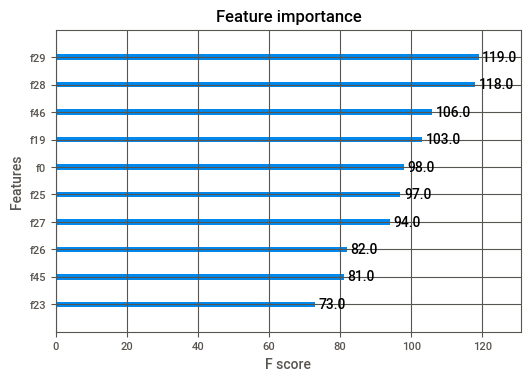

In [166]:
from xgboost import plot_importance
plot_importance(model, max_num_features=10)

In [167]:
X

,SWANID,VISIT,INTDAY,AGE,SAADAY,HOSPSTA,MDTALK,HHMEMSM,NITESWE,TRBLSLE,...,SLEEPQL,CEREACA,BREADCA,ORANGCA,ABLATIN,PELVCPN,FIBRUTR,PRVIDER,FORMSAA,CRELDIE
0,10005,0,0.0,48.0,0.0,0.0,2.0,0.0,1.0,0.0,...,4,6,6,6,2,2,2,2,7,5
1,10046,0,0.0,52.0,0.0,0.0,1.0,0.0,1.0,0.0,...,4,6,6,6,2,2,2,2,7,5
2,10056,0,0.0,51.0,0.0,0.0,1.0,1.0,1.0,0.0,...,4,6,6,6,2,2,2,2,7,5
3,10092,0,0.0,45.0,0.0,0.0,3.0,0.0,1.0,1.0,...,4,6,6,6,2,2,2,2,7,5
4,10126,0,0.0,48.0,0.0,0.0,0.0,1.0,1.0,1.0,...,4,6,6,6,2,2,2,2,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28784,99805,10,3661.0,52.0,3659.0,0.0,4.0,1.0,0.0,0.0,...,0,5,5,2,0,0,0,1,6,0
28785,99809,10,3624.0,53.0,3624.0,0.0,4.0,0.0,1.0,1.0,...,3,5,1,1,0,1,0,1,6,0
28786,99888,10,3661.0,58.0,3661.0,0.0,10.0,0.0,0.0,0.0,...,1,1,1,2,0,0,0,1,6,0
28787,99898,10,3626.0,55.0,3625.0,0.0,3.0,0.0,1.0,1.0,...,1,5,5,1,0,0,0,1,6,0
